### TF(Term Frequency) - IDF(Inverse Document Frequency), 단어 - 역문서 빈도

- 문서의 유사도, 검색 시스템 등의 기본 알고리즘
- TF-IDF 수치가 높을수록 중요도가 높은 단어  
  TF-IDF 기법에서는 이 IDF 값과 TF(Term Frequency) 값(단어가 특정 문서 내에서 얼마나 자주 나타나는지를 측정하는 값)을 곱하여 단어의 중요성을 측정
- TF: 단어 빈도
- IDF: 역문서 빈도 -->  특정 단어가 문서 내에서 얼마나 중요한지를 나타내는 데 도움 줌.

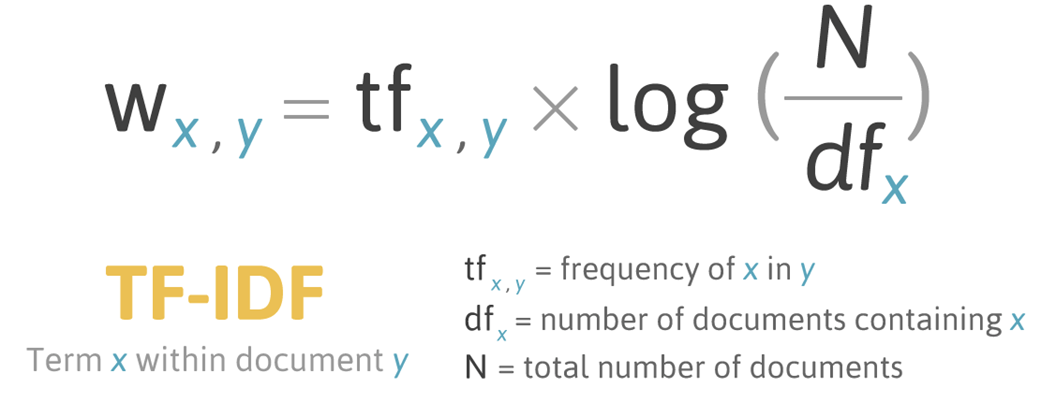

- 특정 문서(1개 문서)에서 많이 등장하고, 전체 여러 문서(N개 문서)에서는 적게 등장하는 단어가 가중치 높게 가져감.

In [4]:
import pandas as pd
from math import log

# 문서 준비
docs = [
    "마트 딸기 진짜 비싸다",
    "나는 오늘 아침 사과 먹겠다",
    "아침 사과 금 사과",
    "나는 오늘 저녁 딸기 먹겠다"
]

# 단어 사전 준비 (문장 split, 단어 unique, 가나다순 정렬)
# vocab

vocab = list(set([word for doc in docs for word in doc.split()]))
vocab.sort()
print(vocab)

['금', '나는', '딸기', '마트', '먹겠다', '비싸다', '사과', '아침', '오늘', '저녁', '진짜']


In [7]:
# 문서 전체 수: N
N = len(docs)

NameError: name 'docs' is not defined

In [29]:
import pandas as pd
# 문서-단어 행렬, Document-Term Matrix (DTM)
# 문서 별로 특정 단어가 몇 번씩 등장하는지 확인
# 1. 문서를 하나씩 읽어온다.
# 2. 해당 문서에 단어 사전에 있는 단어의 빈도를 확인한다.
# 3. dtm 결과 출력

dtm = []

for idx in range(N):
    doc = docs[idx]
    in_dtm = []
    for v_idx in range(len(vocab)):
        voca = vocab[v_idx]
        in_dtm.append(doc.count(voca))
    dtm.append(in_dtm)
dtm = pd.DataFrame(dtm, columns=vocab)
dtm

,금,나는,딸기,마트,먹겠다,비싸다,사과,아침,오늘,저녁,진짜
0,0,0,1,1,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,1,1,0,0
2,1,0,0,0,0,0,2,1,0,0,0
3,0,1,1,0,1,0,0,0,1,1,0


In [78]:
# dtm 결과
dtm

,금,나는,딸기,마트,먹겠다,비싸다,사과,아침,오늘,저녁,진짜
0,0,0,1,1,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,1,1,0,0
2,1,0,0,0,0,0,2,1,0,0,0
3,0,1,1,0,1,0,0,0,1,1,0


##### 문서: d, 단어: t, 문서의 총개수: N
- tf(d,t): 특정 문서 d에서 특정 단어 t의 등장 횟수
- df(t) : 특정 단어 t가 등장한 문서의 수, 특정 문서에 100번 나와도 count = 1 (문서의 개수)
- idf(t) : df(t)에 반비례 하는 수

In [56]:
# tf(d,t): DTM과 동일
def tf(t, d):
    return d.count(t)

# idf(t) = log(n/(df(t)+1))
def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df+1))

def tfidf(t, d):
    return tf(t, d) * idf(t)

In [57]:
# tf 결과 실행

result = []

for idx in range(N):
    result.append([])
    doc = docs[idx]

    for v_idx in range(len(vocab)):
        voca = vocab[v_idx]
        result [-1].append(tf(voca, doc))

tf_ = pd.DataFrame(result, columns=vocab)
tf_

,금,나는,딸기,마트,먹겠다,비싸다,사과,아침,오늘,저녁,진짜
0,0,0,1,1,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,1,1,0,0
2,1,0,0,0,0,0,2,1,0,0,0
3,0,1,1,0,1,0,0,0,1,1,0


In [58]:
# idf 결과 실행

result = []

for v_idx in range(len(vocab)):
    voca = vocab[v_idx]
    result.append(idf(voca))

idf_ = pd.DataFrame(result, index=vocab)
idf_

,0
금,0.693147
나는,0.287682
딸기,0.287682
마트,0.693147
먹겠다,0.287682
비싸다,0.693147
사과,0.287682
아침,0.287682
오늘,0.287682
저녁,0.693147


In [60]:
# tf-idf 결과 실행

result = []

for idx in range(N):
    result.append([])
    doc = docs[idx]
    for v_idx in range(len(vocab)):
        voca = vocab[v_idx]
        result[-1].append(tfidf(voca, doc))

tfidf_ = pd.DataFrame(result, columns=vocab)
tfidf_

,금,나는,딸기,마트,먹겠다,비싸다,사과,아침,오늘,저녁,진짜
0,0.000000,0.000000,0.287682,0.693147,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.693147
1,0.000000,0.287682,0.000000,0.000000,0.287682,0.000000,0.287682,0.287682,0.287682,0.000000,0.000000
2,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.575364,0.287682,0.000000,0.000000,0.000000
3,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000,0.000000,0.287682,0.693147,0.000000


In [54]:
# pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.6 kB 1.4 MB/s eta 0:00:01
     ---------------------------------------- 60.6/60.6 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.6 MB 14.2 MB/s eta 0:00:01
   --------------------- ------------------ 5.7/10.6 MB 72.3 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 108.8 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 81.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ---- ----------------------------------- 5.1/45.9 MB 159.7 MB/s eta 0:00:01
   ----- ---------------------------------- 6.4/45.9 MB 136.0 MB/s eta 0:00:01
   ----- ---------------------------------- 6.5/45.9 MB 81.7 MB/s eta 0:00:01

In [62]:
# sklearn DTM
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()

# 단어 빈도수 (DTM)
print(vector.fit_transform(docs).toarray()) # 한 글자의 경우 지원x로 제외됨.
print(vector.vocabulary_)

[[0 1 1 0 1 0 0 0 0 1]
 [1 0 0 1 0 1 1 1 0 0]
 [0 0 0 0 0 2 1 0 0 0]
 [1 1 0 1 0 0 0 1 1 0]]
{'마트': 2, '딸기': 1, '진짜': 9, '비싸다': 4, '나는': 0, '오늘': 7, '아침': 6, '사과': 5, '먹겠다': 3, '저녁': 8}


In [68]:
# sklearn tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
print(tfidf.fit_transform(docs))

# (문서 번호, 단어 번호) tf-idf
# 0번 문서의 4번째 단어(비싸다)의 tf-idf 값

  (0, 4)	0.5254727492640658
  (0, 9)	0.5254727492640658
  (0, 1)	0.41428875116588965
  (0, 2)	0.5254727492640658
  (1, 3)	0.4472135954999579
  (1, 5)	0.4472135954999579
  (1, 6)	0.4472135954999579
  (1, 7)	0.4472135954999579
  (1, 0)	0.4472135954999579
  (2, 5)	0.8944271909999159
  (2, 6)	0.4472135954999579
  (3, 8)	0.5355662725381126
  (3, 3)	0.4222466008506261
  (3, 7)	0.4222466008506261
  (3, 0)	0.4222466008506261
  (3, 1)	0.4222466008506261


In [69]:
print(tfidf.fit_transform(docs).toarray())
print(tfidf.vocabulary_)
print(tfidf.get_feature_names_out())

[[0.         0.41428875 0.52547275 0.         0.52547275 0.
  0.         0.         0.         0.52547275]
 [0.4472136  0.         0.         0.4472136  0.         0.4472136
  0.4472136  0.4472136  0.         0.        ]
 [0.         0.         0.         0.         0.         0.89442719
  0.4472136  0.         0.         0.        ]
 [0.4222466  0.4222466  0.         0.4222466  0.         0.
  0.         0.4222466  0.53556627 0.        ]]
{'마트': 2, '딸기': 1, '진짜': 9, '비싸다': 4, '나는': 0, '오늘': 7, '아침': 6, '사과': 5, '먹겠다': 3, '저녁': 8}
['나는' '딸기' '마트' '먹겠다' '비싸다' '사과' '아침' '오늘' '저녁' '진짜']


In [ ]:
# 실습: 핵심 키워드 추출해 보기
# 1. 필요 데이터 읽어오기
# 2. 형태소 분석 (불용어 제거) 후 명사추출
# 3. 추출된 명사를 기준으로 tf-idf 계산
# 4. 계산된 tf-idf 높은 값을 가진 데이터로 정렬
# 5. 높은 tf-idf 값을 가지는 '단어' 순으로 출력하기

In [2]:
# 1. 필요 데이터 읽어오기\
import pandas as pd
train_data = pd.read_csv('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt', sep='\t', encoding='utf-8')
train_data['document']

0                                       아 더빙.. 진짜 짜증나네요 목소리
1                         흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                             교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                                  인간이 문제지.. 소는 뭔죄인가..
149996                                        평점이 너무 낮아서...
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                          청춘 영화의 최고봉.방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 150000, dtype: object

In [71]:
# 형태소 분석기 초기화
from konlpy.tag import Okt
stopwords = ['을', '를', '이', '가', '은', '는', '이다', '입니다', '그리고', '그런데', '의', '더', '잘', '었', '였다']

okt = Okt()

# train_data['document']에 있는 데이터에 대해 명사 추출하여 단어 사전 생성
vocab = []
for doc in train_data['document'][:100]:
    nouns = okt.nouns(str(doc))
    for noun in nouns:
        if noun not in stopwords and not isinstance(noun, float):  # stopwords와 float 값을 필터링
            vocab.append(noun)

# 중복 제거를 위해 set으로 변환 후 다시 리스트로 변환
vocab = list(set(vocab))

# 가나다순으로 정렬
vocab.sort()

# 결과 확인
print(vocab)

['가면', '가슴', '가슴속', '가요', '가장', '가족', '간다', '갈등', '갈수록', '감금', '감독', '감동', '감성', '감정', '강추', '개', '건', '건가', '걸', '걸스데이', '걸음', '검사', '것', '결말', '계', '계속', '고추', '골', '골깜', '공감', '관객', '교도소', '구먼', '굿바이', '그', '그것', '그냥', '그대로', '극장', '극적', '근친상간', '기대', '기리', '기본', '기분', '긴장', '긴장감', '길용우', '김남길', '깊이', '깨알', '꼬마', '꼭', '꽃', '꽤', '나름', '나이틀리', '낚임', '난', '난또', '남', '남발', '납득', '납치', '낭비', '내', '내생', '내용', '내일', '냥', '네', '년', '노', '노래실력', '노력', '노잼', '놈', '누', '눈', '느낌', '는걸', '니스', '다그', '다시', '다지', '다큐', '다크', '단면', '단연', '달인', '달팽이', '당황', '대만', '대체', '대한', '대해', '더빙', '던스트', '데', '도', '도안', '돈', '동화', '뒤', '드라마', '드래곤', '듯', '때', '또', '뜻', '락스', '래서', '러시아', '럼', '레닌', '로마노프', '로만', '리스', '리얼리티', '리플릿', '마', '마이너스', '막', '막문위', '만찬', '말', '말로', '맘', '맛', '망신', '매력', '매번', '매우', '머금', '먹듯', '메', '메인', '멜로', '명', '명품', '몇', '모습', '목소리', '몬페', '몰입도', '무난', '무슨', '무재', '문자', '물건', '뭐', '뭘', '뭣같', '뮤비', '미소', '민간인', '민중', '밓었', '바', '바로', '바베트', '바비', '바스코', '박시환', '반개', '반복', '발', '발견

In [72]:
# tf(d,t): DTM과 동일
def tf(t, d):
    return d.count(t)

# idf 함수 정의
def idf(t):
    df = 0
    for doc in train_data['document']:
        if not isinstance(doc, float):  # float 데이터는 제외합니다.
            df += t in doc
    return log(N/(df+1))

def tfidf(t, d):
    return tf(t, d) * idf(t)

In [73]:
# tf 결과 실행

result = []
N = 100
for idx in range(N):
    result.append([])
    doc = train_data['document'][idx]

    for v_idx in range(len(vocab)):
        voca = vocab[v_idx]
        result [-1].append(tf(voca, doc))

tf_ = pd.DataFrame(result, columns=vocab)
tf_

,가면,가슴,가슴속,가요,가장,가족,간다,갈등,갈수록,감금,...,헐리우드,현대,혼자,화신,화해,활,활짝,횡단보도,흠,흥행
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# idf 결과 실행
from math import log
result = []

for v_idx in range(len(vocab)):
    voca = vocab[v_idx]
    result.append(idf(voca))

idf_ = pd.DataFrame(result, index=vocab)
idf_

,0
가면,-1.064711
가슴,-2.597491
가슴속,1.049822
가요,-1.560248
가장,-2.618855
...,...
활,-1.715598
활짝,2.302585
횡단보도,3.912023
흠,-1.235471


In [ ]:
# tf-idf 결과 실행

result = []

for idx in range(N):
    result.append([])
    doc = train_data['document'][idx]
    for v_idx in range(len(vocab)):
        voca = vocab[v_idx]
        result[-1].append(tfidf(voca, doc))

tfidf_ = pd.DataFrame(result, columns=vocab)
tfidf_

- 다른 방식으로 tf-idf 실행

In [ ]:
# sklearn DTM
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()

# 단어 빈도수 (DTM)
print(vector.fit_transform(train_data['document'][:200]).toarray()) # 한 글자의 경우 지원x로 제외됨.
print(vector.vocabulary_)

In [ ]:
# sklearn tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
print(tfidf.fit_transform(train_data['document'][:200]))
print(tfidf.fit_transform(train_data['document'][:200]).toarray())
print(tfidf.vocabulary_)
print(tfidf.get_feature_names_out())

---

In [31]:
# 실습: 핵심 키워드 추출해 보기
# 1. 필요 데이터 읽어오기
# 2. 형태소 분석 (불용어 제거) 후 명사추출
# 3. 추출된 명사를 기준으로 tf-idf 계산
# 4. 계산된 tf-idf 높은 값을 가진 데이터로 정렬
# 5. 높은 tf-idf 값을 가지는 '단어' 순으로 출력하기

from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
okt = Okt()

# 문서 준비
docs = [
    "마트 딸기 진짜 비싸다",
    "나는 오늘 아침으로 사과를 먹었다",
    "아침 사과는 금사과다",
    "나는 오늘 저녁에 딸기를 먹겠다"
]
text = " ".join(docs)

# 명사추출

nouns = okt.nouns(text)
processed_text = " ".join(nouns)
print(processed_text)

# TF-IDF 벡터
vecotrizer = TfidfVectorizer()

# 텍스트를 TF-IDF 벡터로 변환
tfidf_matrix = vecotrizer.fit_transform([processed_text])
print(tfidf_matrix)

# 단어와 그에 대한 TF-IDF 값 얻기
feature_names = vecotrizer.get_feature_names_out()
print(feature_names)
tfidf_values = tfidf_matrix.toarray().tolist()[0]
print(tfidf_values)

keywords = [feature_names[i] for i in sorted(range(len(tfidf_values)), key=lambda k: tfidf_values[k], reverse=True)]
print(keywords)

마트 딸기 진짜 나 오늘 아침 사과 아침 사과 금 사과 나 오늘 저녁 딸기
  (0, 5)	0.20412414523193154
  (0, 2)	0.6123724356957946
  (0, 3)	0.4082482904638631
  (0, 4)	0.4082482904638631
  (0, 6)	0.20412414523193154
  (0, 0)	0.4082482904638631
  (0, 1)	0.20412414523193154
['딸기' '마트' '사과' '아침' '오늘' '저녁' '진짜']
[0.4082482904638631, 0.20412414523193154, 0.6123724356957946, 0.4082482904638631, 0.4082482904638631, 0.20412414523193154, 0.20412414523193154]
['사과', '딸기', '아침', '오늘', '마트', '저녁', '진짜']
